In [1]:
import pandas as pd
from sqlalchemy import create_engine

In [2]:
csv_file = "..//Resources/airlines.csv"
airlines_df = pd.read_csv(csv_file)
airlines_df.head()

,Airline ID,Name,Alias,IATA,ICAO,Callsign,Country,Active
0,-1,TRUE,\N,-,NaN,\N,\N,Y
1,1,Private flight,\N,-,NaN,NaN,NaN,Y
2,2,135 Airways,\N,NaN,GNL,GENERAL,United States,N
3,3,1Time Airline,\N,1T,RNX,NEXTIME,South Africa,Y
4,4,2 Sqn No 1 Elementary Flying Training School,\N,NaN,WYT,NaN,United Kingdom,N


In [3]:
new_airlines_df =airlines_df[["Airline ID","Name","IATA","ICAO","Country","Active"]]
new_airlines_df.head()

,Airline ID,Name,IATA,ICAO,Country,Active
0,-1,TRUE,-,NaN,\N,Y
1,1,Private flight,-,NaN,NaN,Y
2,2,135 Airways,NaN,GNL,United States,N
3,3,1Time Airline,1T,RNX,South Africa,Y
4,4,2 Sqn No 1 Elementary Flying Training School,NaN,WYT,United Kingdom,N


In [4]:
csv_file = "..//Resources/Airline_crash_data.csv"
airlines_crash_df = pd.read_csv(csv_file)
airlines_crash_df.head()

,Date,Date.1,Month,Year,Time,Location,Operator,Flight #,Route,Type,Registration,cn/In,Aboard,Fatalities,Ground,Summary
0,09/17/1908,9,17,1908,17:18,"Fort Myer, Virginia",Military - U.S. Army,NaN,Demonstration,Wright Flyer III,NaN,1,2.0,1.0,0.0,"During a demonstration flight, a U.S. Army fly..."
1,7/12/1912,7,12,1912,6:30,"AtlantiCity, New Jersey",Military - U.S. Navy,NaN,Test flight,Dirigible,NaN,NaN,5.0,5.0,0.0,First U.S. dirigible Akron exploded just offsh...
2,8/06/1913,8,6,1913,NaN,"Victoria, British Columbia, Canada",Private,-,NaN,Curtiss seaplane,NaN,NaN,1.0,1.0,0.0,The first fatal airplane accident in Canada oc...
3,9/09/1913,9,9,1913,18:30,Over the North Sea,Military - German Navy,NaN,NaN,Zeppelin L-1 (airship),NaN,NaN,20.0,14.0,0.0,The airship flew into a thunderstorm and encou...
4,10/17/1913,10,17,1913,10:30,"Near Johannisthal, Germany",Military - German Navy,NaN,NaN,Zeppelin L-2 (airship),NaN,NaN,30.0,30.0,0.0,Hydrogen gas which was being vented was sucked...


In [5]:
new_airlines_crash_df = airlines_crash_df[["Date", "Year", "Location","Operator","Type","Aboard","Fatalities","Summary"]].copy()
new_airlines_crash_df.head()

,Date,Year,Location,Operator,Type,Aboard,Fatalities,Summary
0,09/17/1908,1908,"Fort Myer, Virginia",Military - U.S. Army,Wright Flyer III,2.0,1.0,"During a demonstration flight, a U.S. Army fly..."
1,7/12/1912,1912,"AtlantiCity, New Jersey",Military - U.S. Navy,Dirigible,5.0,5.0,First U.S. dirigible Akron exploded just offsh...
2,8/06/1913,1913,"Victoria, British Columbia, Canada",Private,Curtiss seaplane,1.0,1.0,The first fatal airplane accident in Canada oc...
3,9/09/1913,1913,Over the North Sea,Military - German Navy,Zeppelin L-1 (airship),20.0,14.0,The airship flew into a thunderstorm and encou...
4,10/17/1913,1913,"Near Johannisthal, Germany",Military - German Navy,Zeppelin L-2 (airship),30.0,30.0,Hydrogen gas which was being vented was sucked...


In [6]:
new_airlines_crash_df.count()

Date          5268
Year          5268
Location      5248
Operator      5250
Type          5241
Aboard        5246
Fatalities    5256
Summary       4878
dtype: int64

In [7]:
new_airlines_crash_df.dtypes

Date           object
Year            int64
Location       object
Operator       object
Type           object
Aboard        float64
Fatalities    float64
Summary        object
dtype: object

In [8]:
import datetime as dt
new_airlines_crash_df['Date'] = pd.to_datetime(new_airlines_crash_df['Date'])

include = new_airlines_crash_df[new_airlines_crash_df['Date'].dt.year >= 1970]
# exclude = new_airlines_crash_df[new_airlines_crash_df['Date'].dt.year <= 1970]
include.head()

,Date,Year,Location,Operator,Type,Aboard,Fatalities,Summary
1237,1970-02-13,1970,"Pin-la-Garenne, France",Avia-Taxi,Cessna 402,10.0,10.0,NaN
1643,1973-05-11,1973,"Near Semipalatinsk, USSR",Aeroflot,Ilyushin IL-18B,61.0,61.0,NaN
1807,1973-10-12,1973,"Acapulco, Mexico",Avionas Banamex,de Havilland DH-125-1A,8.0,8.0,Crashed while approaching to land.
1965,1973-10-15,1973,"Fort Smith AFB, Oklahoma",Military - U.S. Air Force,Lockheed C-130E Hercules,7.0,7.0,Crashed into a mountain.
2003,1975-07-31,1975,"Santiago, Chili",Military - Chilian Air Force,Douglas C-47,10.0,10.0,NaN


In [9]:

include["Fatalities_rate"] = (include["Fatalities"]/include["Aboard"])*100
include

,Date,Year,Location,Operator,Type,Aboard,Fatalities,Summary,Fatalities_rate
1237,1970-02-13,1970,"Pin-la-Garenne, France",Avia-Taxi,Cessna 402,10.0,10.0,NaN,100.0
1643,1973-05-11,1973,"Near Semipalatinsk, USSR",Aeroflot,Ilyushin IL-18B,61.0,61.0,NaN,100.0
1807,1973-10-12,1973,"Acapulco, Mexico",Avionas Banamex,de Havilland DH-125-1A,8.0,8.0,Crashed while approaching to land.,100.0
1965,1973-10-15,1973,"Fort Smith AFB, Oklahoma",Military - U.S. Air Force,Lockheed C-130E Hercules,7.0,7.0,Crashed into a mountain.,100.0
2003,1975-07-31,1975,"Santiago, Chili",Military - Chilian Air Force,Douglas C-47,10.0,10.0,NaN,100.0
...,...,...,...,...,...,...,...,...,...
5263,2009-05-20,2009,"Near Madiun, Indonesia",Military - Indonesian Air Force,Lockheed C-130 Hercules,112.0,98.0,"While on approach, the military transport cras...",87.5
5264,2009-05-26,2009,"Near Isiro, DemocratiRepubliCongo",Service Air,Antonov An-26,4.0,4.0,The cargo plane crashed while on approach to I...,100.0
5265,2009-06-01,2009,"AtlantiOcean, 570 miles northeast of Natal, Br...",Air France,Airbus A330-203,228.0,228.0,The Airbus went missing over the AtlantiOcean ...,100.0
5266,2009-06-07,2009,"Near Port Hope Simpson, Newfoundland, Canada",Strait Air,Britten-Norman BN-2A-27 Islander,1.0,1.0,The air ambulance crashed into hills while att...,100.0


In [10]:
bins = [1970, 1979, 1989, 1999,2009]

# Create the names for the five bins
group_names = ["70's", "80's", "90's", "00's"]
include_grouped = include.copy()
include_grouped["Year"] = pd.cut(include["Year"], bins, labels=group_names, include_lowest=True)
include_grouped.head()

,Date,Year,Location,Operator,Type,Aboard,Fatalities,Summary,Fatalities_rate
1237,1970-02-13,70's,"Pin-la-Garenne, France",Avia-Taxi,Cessna 402,10.0,10.0,NaN,100.0
1643,1973-05-11,70's,"Near Semipalatinsk, USSR",Aeroflot,Ilyushin IL-18B,61.0,61.0,NaN,100.0
1807,1973-10-12,70's,"Acapulco, Mexico",Avionas Banamex,de Havilland DH-125-1A,8.0,8.0,Crashed while approaching to land.,100.0
1965,1973-10-15,70's,"Fort Smith AFB, Oklahoma",Military - U.S. Air Force,Lockheed C-130E Hercules,7.0,7.0,Crashed into a mountain.,100.0
2003,1975-07-31,70's,"Santiago, Chili",Military - Chilian Air Force,Douglas C-47,10.0,10.0,NaN,100.0


In [11]:
include_grouped

,Date,Year,Location,Operator,Type,Aboard,Fatalities,Summary,Fatalities_rate
1237,1970-02-13,70's,"Pin-la-Garenne, France",Avia-Taxi,Cessna 402,10.0,10.0,NaN,100.0
1643,1973-05-11,70's,"Near Semipalatinsk, USSR",Aeroflot,Ilyushin IL-18B,61.0,61.0,NaN,100.0
1807,1973-10-12,70's,"Acapulco, Mexico",Avionas Banamex,de Havilland DH-125-1A,8.0,8.0,Crashed while approaching to land.,100.0
1965,1973-10-15,70's,"Fort Smith AFB, Oklahoma",Military - U.S. Air Force,Lockheed C-130E Hercules,7.0,7.0,Crashed into a mountain.,100.0
2003,1975-07-31,70's,"Santiago, Chili",Military - Chilian Air Force,Douglas C-47,10.0,10.0,NaN,100.0
...,...,...,...,...,...,...,...,...,...
5263,2009-05-20,00's,"Near Madiun, Indonesia",Military - Indonesian Air Force,Lockheed C-130 Hercules,112.0,98.0,"While on approach, the military transport cras...",87.5
5264,2009-05-26,00's,"Near Isiro, DemocratiRepubliCongo",Service Air,Antonov An-26,4.0,4.0,The cargo plane crashed while on approach to I...,100.0
5265,2009-06-01,00's,"AtlantiOcean, 570 miles northeast of Natal, Br...",Air France,Airbus A330-203,228.0,228.0,The Airbus went missing over the AtlantiOcean ...,100.0
5266,2009-06-07,00's,"Near Port Hope Simpson, Newfoundland, Canada",Strait Air,Britten-Norman BN-2A-27 Islander,1.0,1.0,The air ambulance crashed into hills while att...,100.0


In [12]:
include_grouped[include_grouped['Year']== "00's"]

,Date,Year,Location,Operator,Type,Aboard,Fatalities,Summary,Fatalities_rate
4587,2001-01-08,00's,"Near Silimo, Indonesia",Military - Tentara Nasional Indonesia Navy,CASA 212-MP Aviocar 200,9.0,9.0,"Struck Timika Peak at 11,800 ft. shortly after...",100.00
4669,2001-01-04,00's,"Zheng Zou AB, China",Military - People's Liberation Army,Shaanxi Yunshuji Y-8/Yunshuji Y-8,16.0,16.0,Two Antonov 12 planes collided in midair killi...,100.00
4682,2000-04-05,00's,"Marianna, Florida",Bankair,Learjet 35A,3.0,3.0,While on finals the training flight pitched up...,100.00
4683,2000-04-19,00's,"Bukavu, DemocratiRepubliCongo",Kivu Air Services,Cessna 208B Caravan I,2.0,2.0,The charter flight crashed in the Kahuzi-Biega...,100.00
4689,2000-01-05,00's,"Abuja, Nigeria",Skypower Express Airways,Embraer 110P1A Bandeirante,16.0,1.0,During a visual approach the aircraft stalled ...,6.25
...,...,...,...,...,...,...,...,...,...
5263,2009-05-20,00's,"Near Madiun, Indonesia",Military - Indonesian Air Force,Lockheed C-130 Hercules,112.0,98.0,"While on approach, the military transport cras...",87.50
5264,2009-05-26,00's,"Near Isiro, DemocratiRepubliCongo",Service Air,Antonov An-26,4.0,4.0,The cargo plane crashed while on approach to I...,100.00
5265,2009-06-01,00's,"AtlantiOcean, 570 miles northeast of Natal, Br...",Air France,Airbus A330-203,228.0,228.0,The Airbus went missing over the AtlantiOcean ...,100.00
5266,2009-06-07,00's,"Near Port Hope Simpson, Newfoundland, Canada",Strait Air,Britten-Norman BN-2A-27 Islander,1.0,1.0,The air ambulance crashed into hills while att...,100.00


In [13]:
include_grouped['Date'].max()

Timestamp('2009-06-08 00:00:00')

In [14]:
include_grouped['Date'].min()

Timestamp('1970-01-01 00:00:00')

In [21]:
import statsmodels.api as sm
import scipy.stats as st
import matplotlib.pyplot as plt
import seaborn as sn
from sklearn.metrics import confusion_matrix
import matplotlib.mlab as mlab
%matplotlib inline
import seaborn as sns

In [15]:
from statsmodels.tools import add_constant as add_constant
include_grouped_constant = add_constant(include_grouped)
include_grouped_constant.head()


,const,Date,Year,Location,Operator,Type,Aboard,Fatalities,Summary,Fatalities_rate
1237,1.0,1970-02-13,70's,"Pin-la-Garenne, France",Avia-Taxi,Cessna 402,10.0,10.0,NaN,100.0
1643,1.0,1973-05-11,70's,"Near Semipalatinsk, USSR",Aeroflot,Ilyushin IL-18B,61.0,61.0,NaN,100.0
1807,1.0,1973-10-12,70's,"Acapulco, Mexico",Avionas Banamex,de Havilland DH-125-1A,8.0,8.0,Crashed while approaching to land.,100.0
1965,1.0,1973-10-15,70's,"Fort Smith AFB, Oklahoma",Military - U.S. Air Force,Lockheed C-130E Hercules,7.0,7.0,Crashed into a mountain.,100.0
2003,1.0,1975-07-31,70's,"Santiago, Chili",Military - Chilian Air Force,Douglas C-47,10.0,10.0,NaN,100.0


In [16]:
include_grouped_constant.groupby('Year').count()


,const,Date,Location,Operator,Type,Aboard,Fatalities,Summary,Fatalities_rate
Year,,,,,,,,,
70's,837,837,835,835,837,836,837,796,836
80's,717,717,715,717,717,714,717,674,712
90's,775,775,773,773,773,774,775,761,774
00's,583,583,581,582,582,582,582,581,582


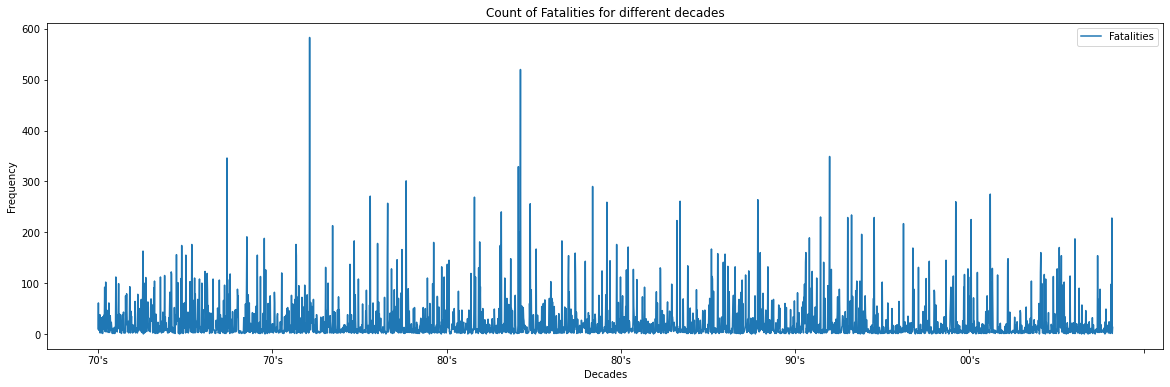

In [24]:
include_grouped_constant.plot(x="Year",y="Fatalities",kind="line",figsize=(20,6))
plt.title('Count of Fatalities for different decades')
plt.xlabel('Decades')
plt.ylabel('Frequency')
plt.savefig('FatalityrateAcrossDecades.png')
plt.show()

In [25]:
new1_df =include_grouped_constant.groupby('Year').mean()
new1_df

,const,Aboard,Fatalities,Fatalities_rate
Year,,,,
70's,1.0,33.681818,25.240143,83.896590
80's,1.0,36.920168,24.914923,82.596859
90's,1.0,33.293282,21.784516,80.647992
00's,1.0,27.501718,18.972509,81.729160


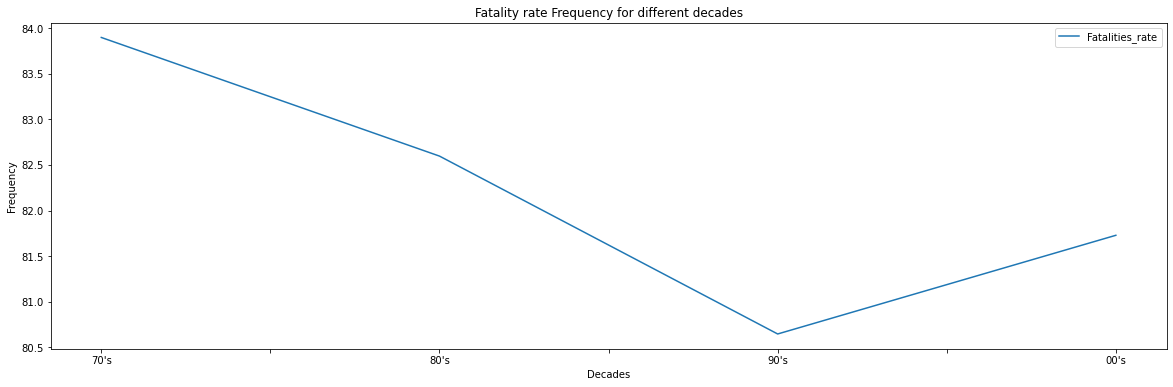

In [26]:
new1_df.plot(y="Fatalities_rate",kind="line",figsize=(20,6))
plt.title('Fatality rate Frequency for different decades')
plt.xlabel('Decades')
plt.ylabel('Frequency')
plt.savefig('FatalityrateAcrossDecades.png')
plt.show()

In [17]:
new2_df= include_grouped.copy()
new2_df.dropna(inplace=True)
new2_df.head()


,Date,Year,Location,Operator,Type,Aboard,Fatalities,Summary,Fatalities_rate
1807,1973-10-12,70's,"Acapulco, Mexico",Avionas Banamex,de Havilland DH-125-1A,8.0,8.0,Crashed while approaching to land.,100.0
1965,1973-10-15,70's,"Fort Smith AFB, Oklahoma",Military - U.S. Air Force,Lockheed C-130E Hercules,7.0,7.0,Crashed into a mountain.,100.0
2077,1975-11-17,70's,"Near Sukhumi, Georgia, USSR",Aeroflot,Antonov AN-24,38.0,38.0,Crashed into high ground while descending.,100.0
2362,1970-01-01,70's,"Nulato, Alaska",Galena Air Service - Air Taxi,Cessna 180,4.0,2.0,Emergency flight to airlift sick patient. Coll...,50.0
2363,1970-01-05,70's,"Stockholm, Sweden",Spantax,Convair CV-990-30A-5,10.0,5.0,The plane developed trouble in the No. 4 engin...,50.0


In [18]:
new3_df= new2_df["Location"].str.split(",",n=1, expand=True) 

new3_df.head(15)

,0,1
1807,Acapulco,Mexico
1965,Fort Smith AFB,Oklahoma
2077,Near Sukhumi,"Georgia, USSR"
2362,Nulato,Alaska
2363,Stockholm,Sweden
2364,Near Villia Greece,None
2365,Faleolo,Western Samoa
2366,Mt. Pumacona,Peru
2367,Portage,Michigan
2368,Near Poza Rica,Mexico


In [26]:
new2_df["City_crash"] =new3_df[0]
new2_df["Country_crash"] =new3_df[1]
new2_df

,Date,Year,Location,Operator,Type,Aboard,Fatalities,Summary,Fatalities_rate,City_crash,Country_crash
1807,1973-10-12,70's,"Acapulco, Mexico",Avionas Banamex,de Havilland DH-125-1A,8.0,8.0,Crashed while approaching to land.,100.0,Acapulco,Mexico
1965,1973-10-15,70's,"Fort Smith AFB, Oklahoma",Military - U.S. Air Force,Lockheed C-130E Hercules,7.0,7.0,Crashed into a mountain.,100.0,Fort Smith AFB,Oklahoma
2077,1975-11-17,70's,"Near Sukhumi, Georgia, USSR",Aeroflot,Antonov AN-24,38.0,38.0,Crashed into high ground while descending.,100.0,Near Sukhumi,"Georgia, USSR"
2362,1970-01-01,70's,"Nulato, Alaska",Galena Air Service - Air Taxi,Cessna 180,4.0,2.0,Emergency flight to airlift sick patient. Coll...,50.0,Nulato,Alaska
2363,1970-01-05,70's,"Stockholm, Sweden",Spantax,Convair CV-990-30A-5,10.0,5.0,The plane developed trouble in the No. 4 engin...,50.0,Stockholm,Sweden
...,...,...,...,...,...,...,...,...,...,...,...
5263,2009-05-20,00's,"Near Madiun, Indonesia",Military - Indonesian Air Force,Lockheed C-130 Hercules,112.0,98.0,"While on approach, the military transport cras...",87.5,Near Madiun,Indonesia
5264,2009-05-26,00's,"Near Isiro, DemocratiRepubliCongo",Service Air,Antonov An-26,4.0,4.0,The cargo plane crashed while on approach to I...,100.0,Near Isiro,DemocratiRepubliCongo
5265,2009-06-01,00's,"AtlantiOcean, 570 miles northeast of Natal, Br...",Air France,Airbus A330-203,228.0,228.0,The Airbus went missing over the AtlantiOcean ...,100.0,AtlantiOcean,"570 miles northeast of Natal, Brazil"
5266,2009-06-07,00's,"Near Port Hope Simpson, Newfoundland, Canada",Strait Air,Britten-Norman BN-2A-27 Islander,1.0,1.0,The air ambulance crashed into hills while att...,100.0,Near Port Hope Simpson,"Newfoundland, Canada"


In [29]:
new4_df= new2_df["Country_crash"].str.split(",",n=1, expand=True) 
new4_df

,0,1
1807,Mexico,None
1965,Oklahoma,None
2077,Georgia,USSR
2362,Alaska,None
2363,Sweden,None
...,...,...
5263,Indonesia,None
5264,DemocratiRepubliCongo,None
5265,570 miles northeast of Natal,Brazil
5266,Newfoundland,Canada


In [30]:
import numpy as np

In [32]:
new4_df[0] =np.where(~new4_df[1].isnull(),new4_df[1],new4_df[0])

In [33]:
new4_df

,0,1
1807,Mexico,None
1965,Oklahoma,None
2077,USSR,USSR
2362,Alaska,None
2363,Sweden,None
...,...,...
5263,Indonesia,None
5264,DemocratiRepubliCongo,None
5265,Brazil,Brazil
5266,Canada,Canada


In [34]:
new2_df["Country_crash"] =new4_df[0]
new2_df

,Date,Year,Location,Operator,Type,Aboard,Fatalities,Summary,Fatalities_rate,City_crash,Country_crash
1807,1973-10-12,70's,"Acapulco, Mexico",Avionas Banamex,de Havilland DH-125-1A,8.0,8.0,Crashed while approaching to land.,100.0,Acapulco,Mexico
1965,1973-10-15,70's,"Fort Smith AFB, Oklahoma",Military - U.S. Air Force,Lockheed C-130E Hercules,7.0,7.0,Crashed into a mountain.,100.0,Fort Smith AFB,Oklahoma
2077,1975-11-17,70's,"Near Sukhumi, Georgia, USSR",Aeroflot,Antonov AN-24,38.0,38.0,Crashed into high ground while descending.,100.0,Near Sukhumi,USSR
2362,1970-01-01,70's,"Nulato, Alaska",Galena Air Service - Air Taxi,Cessna 180,4.0,2.0,Emergency flight to airlift sick patient. Coll...,50.0,Nulato,Alaska
2363,1970-01-05,70's,"Stockholm, Sweden",Spantax,Convair CV-990-30A-5,10.0,5.0,The plane developed trouble in the No. 4 engin...,50.0,Stockholm,Sweden
...,...,...,...,...,...,...,...,...,...,...,...
5263,2009-05-20,00's,"Near Madiun, Indonesia",Military - Indonesian Air Force,Lockheed C-130 Hercules,112.0,98.0,"While on approach, the military transport cras...",87.5,Near Madiun,Indonesia
5264,2009-05-26,00's,"Near Isiro, DemocratiRepubliCongo",Service Air,Antonov An-26,4.0,4.0,The cargo plane crashed while on approach to I...,100.0,Near Isiro,DemocratiRepubliCongo
5265,2009-06-01,00's,"AtlantiOcean, 570 miles northeast of Natal, Br...",Air France,Airbus A330-203,228.0,228.0,The Airbus went missing over the AtlantiOcean ...,100.0,AtlantiOcean,Brazil
5266,2009-06-07,00's,"Near Port Hope Simpson, Newfoundland, Canada",Strait Air,Britten-Norman BN-2A-27 Islander,1.0,1.0,The air ambulance crashed into hills while att...,100.0,Near Port Hope Simpson,Canada


In [35]:
countrydecade_df =new2_df[['Year','Aboard','Fatalities','Fatalities_rate','City_crash','Country_crash']].groupby(['Country_crash','Year']).count()
countrydecade_df.head(25)

Aboard  Fatalities  Fatalities_rate  City_crash
Country_crash    Year                                                 
  Australia      70's     NaN         NaN              NaN         NaN
                 80's     NaN         NaN              NaN         NaN
                 90's     1.0         1.0              1.0         1.0
                 00's     NaN         NaN              NaN         NaN
  Bolivia        70's     1.0         1.0              1.0         1.0
                 80's     NaN         NaN              NaN         NaN
                 90's     NaN         NaN              NaN         NaN
                 00's     NaN         NaN              NaN         NaN
  Brazil         70's     NaN         NaN              NaN         NaN
                 80's     NaN         NaN              NaN         NaN
                 90's     NaN         NaN              NaN         NaN
                 00's     1.0         1.0              1.0         1.0
  Cameroon       70's     NaN         NaN              NaN         NaN
                 80's     1.0         1.0              1.0         1.0
                 90's     NaN         NaN              NaN         NaN
                 00's     NaN         NaN              NaN         NaN
  Canada         70's     NaN         NaN              NaN         NaN
                 80's     1.0         1.0              1.0         1.0
                 90's     NaN         NaN              NaN         NaN
                 00's     NaN         NaN              NaN         NaN
  Canary Islands 70's     1.0         1.0              1.0         1.0
                 80's     NaN         NaN              NaN         NaN
                 90's     NaN         NaN              NaN         NaN
                 00's     NaN         NaN              NaN         NaN
  Colombia       70's     1.0         1.0              1.0         1.0

In [66]:
from matplotlib import cm

In [73]:

locationdrop_df.plot.scatter(x='Country_crash',y="Year",s=None,c=None)
                                
        
plt.savefig('FatalityrateAcrossCountries.png')
plt.show()

KeyError: 'Country_crash'

Object `df.plot.scatter` not found.


In [37]:
new2_df[new2_df['Country_crash']== "USSR"]

,Date,Year,Location,Operator,Type,Aboard,Fatalities,Summary,Fatalities_rate,City_crash,Country_crash


In [4]:
from scipy.stats import linregress

In [5]:
# include_grouped.plot(x="Country_crash",y="Fatalities_rate",kind="line",figsize=(20,6))

x_values = locationdrop_df['Country_crash']
y_values = locationdrop_df['Fatalities_rate']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(45,30))
plt.annotate(f"r^2= {round((rvalue**2),8)}",(45,28))
plt.xlabel('Country_crash')
plt.ylabel('Fatalities_rate')  
plt.savefig('FatalityrateAcrossCountries.png')
plt.show()

NameError: name 'include_grouped' is not defined